In [1]:
from mymodules import intcode as itc
import matplotlib.pyplot as plt
import numpy as np

Program is finished. Haulting.


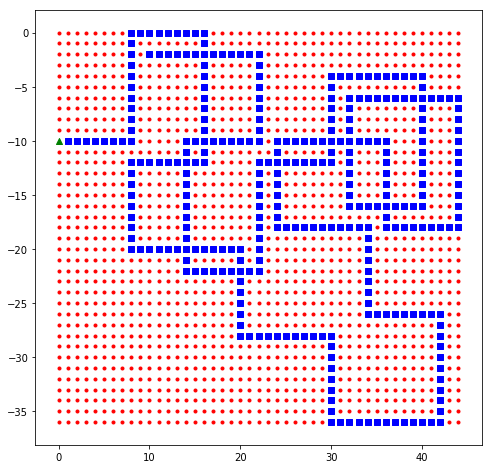

In [2]:
with open('input.txt', 'r') as infile:
    strintcode = infile.read().replace('\n', '').split(',')
    
intcode = [int(x) for x in strintcode]
computer = itc.IntcodeComputer()
computer.load_intcode(intcode)
view = dict()
x = 0
y = 0

while True:
    # Running computer repeatedly with no input
    output = computer.run()
    if output == 'end':
        break
    
    char = chr(output) 
    if char == '\n':
        y -= 1j
        x = 0
        continue
        
    view[x+y] = char
    x += 1
    

# Plotting the view    
fig = plt.figure(figsize=(8, 8))

x = [z.real for z in view if view[z] == '.']
y = [z.imag for z in view if view[z] == '.']
plt.scatter(x, y, c='r', marker = '.')

x = [z.real for z in view if view[z] == '#']
y = [z.imag for z in view if view[z] == '#']
plt.scatter(x, y, c='b', marker = 's')

x = [z.real for z in view if view[z] == '^']
y = [z.imag for z in view if view[z] == '^']
plt.scatter(x, y, c='green', marker = '^')

plt.show()

In [3]:
target = 0
intersec = 0

# Find all intersections
for z in view:
    # if the position is on the path
    if view[z] == '#':
        try:
            up = view[z+1j]
            down = view[z-1j]
            left = view[z-1]
            right = view[z+1]
    
        except:
            continue
            
        # look up, down, left and right: if all positions are still on the path 
        # the current point is an intersection. Count and compute the alignment parameter
        if up == '#' and down == '#' and left == '#' and right == '#':
            intersec += 1
            target += abs(z.real)*abs(z.imag)
            
print('There are ', intersec,'intersections, with alignment parameters that sum up to', target)

There are  10 intersections, with alignment parameters that sum up to 2804.0


### Part 2

By looking at the image above we can simply spot a path that visits all the positions: thi is the path that obeys the simple rule "Go as straight as you can" and is realized by the following set of instructions.

In [4]:
pos = [z for z in view if view[z] == '^'][-1]
instructions = ['R']
go_on = 1
repeat = 0

while True:
    
    if pos+go_on in view and view[pos+go_on] == '#':
        repeat += 1
        pos += go_on
        
    else:
        instructions.append(repeat)
    
        if pos+go_on*1j in view and view[pos+go_on*1j] == '#':

            go_on *= 1j
            instructions.append('L')
    
        elif pos+go_on*(-1j) in view and view[pos+go_on*(-1j)] == '#':
            go_on *= -1j
            instructions.append('R')
        
        else:
            break
            
        repeat = 1
        pos += go_on

print(instructions)    

['R', 8, 'L', 10, 'R', 8, 'R', 12, 'R', 8, 'L', 8, 'L', 12, 'R', 8, 'L', 10, 'R', 8, 'L', 12, 'L', 10, 'L', 8, 'R', 8, 'L', 10, 'R', 8, 'R', 12, 'R', 8, 'L', 8, 'L', 12, 'L', 12, 'L', 10, 'L', 8, 'L', 12, 'L', 10, 'L', 8, 'R', 8, 'L', 10, 'R', 8, 'R', 12, 'R', 8, 'L', 8, 'L', 12]


In [5]:
# It isn't difficult, by looking at the previous list, to identify the following 3 'atomic' set of instruction,
# by repeating which we can construct the whole list. The instructions are:
# A) R8,L10,R8
# B) R12, R8, L8, L12
# C) L12, L10, L8
#
# in terms of these instructions the above list can be written as:
# [A, B, A, C, A, B, C, C, A, B]
#
# We now translate all this information to in input for our intcode computer.
r = ord('R')
l = ord('L')
a = ord('A')
b = ord('B')
c = ord('C')
comma = ord(',')

A = [r, comma, ord('8'), comma, l, comma, ord('6'), comma, ord('4'), comma, r, comma, ord('8'), 10]
B = [r, comma, ord('6'), comma, ord('6'), comma, r, comma, ord('8'), comma, l, comma, ord('8'), 
     comma, l, comma, ord('6'), comma, ord('6'),  10]
C = [l, comma, ord('6'), comma, ord('6'), comma, l, comma, ord('6'), comma, ord('4'), comma, l, 
     comma, ord('8'), 10]
main = [a, comma, b, comma, a, comma, c, comma, a, comma, b, comma, c, comma, c, comma, a, comma, 
        b, 10]

print('The main routine and functions in ASCII form are:')
print('MAIN: (length: ', len(main),')',  main)
print('A: (length: ', len(A),')',  A)
print('B: (length: ', len(B),')',  B)
print('C: (length: ', len(C),')',  C)

The main routine and functions in ASCII form are:
MAIN: (length:  20 ) [65, 44, 66, 44, 65, 44, 67, 44, 65, 44, 66, 44, 67, 44, 67, 44, 65, 44, 66, 10]
A: (length:  14 ) [82, 44, 56, 44, 76, 44, 54, 44, 52, 44, 82, 44, 56, 10]
B: (length:  20 ) [82, 44, 54, 44, 54, 44, 82, 44, 56, 44, 76, 44, 56, 44, 76, 44, 54, 44, 54, 10]
C: (length:  16 ) [76, 44, 54, 44, 54, 44, 76, 44, 54, 44, 52, 44, 76, 44, 56, 10]


In [13]:
# We are now ready to run the robot. Two last details:
# - Disabling video feed:
video = [ord('n'), 10]
# - Changing memory address 0 from value '1' to '2' to turn on the robot
intcode[0] = 2

# Reset computer state
computer.load_intcode(intcode)

# Full input of the program
full_input = main + A + B + C + video

while True:
    output = computer.run(user_input=full_input)
    
    #print(chr(output) else '\b')
    if output == 'end':
        break
        
    if (chr(output) != '.' and chr(output) != '#' and chr(output)!= '\n'):
        print(chr(output))   
    x = output
    
print('Total collected:', x)

^
M
a
i
n
:
F
u
n
c
t
i
o
n
 
A
:
F
u
n
c
t
i
o
n
 
B
:
F
u
n
c
t
i
o
n
 
C
:
C
o
n
t
i
n
u
o
u
s
 
v
i
d
e
o
 
f
e
e
d
?
<
󋞕
Program is finished. Haulting.
Total collected: 833429
